## The problem

My dog was diagnosed with Canine distemper virus when she was a puppy. This virus degenerates the nervous system, leaving lasting signs such as seizures and tics.

When she started with the symptoms our vet told us to be more alert on full moons, as she could be prone to have more seizures on those days.

I've been collecting data on every event she has, and as I was always exceptical of this I wanted to see if it was true.

## Data cleaning

In [2]:
import numpy as np
import pandas as pd

In [3]:
moon = pd.read_csv('data/lunardata.txt',
                   converters={'month': '{:0>2}'.format, 'day': '{:0>2}'.format})
moon.head()


,year,month,day,luna
0,1992,01,04,0
1,1992,01,05,1
2,1992,01,06,2
3,1992,01,07,3
4,1992,01,08,4


In [4]:
# creates the date column with the same format as the existing one in the seizures dataframe
moon['date'] = (moon['year'].astype(str) + moon['month'].astype(str) + moon['day'].astype(str)).astype(int)
moon.head()

,year,month,day,luna,date
0,1992,01,04,0,19920104
1,1992,01,05,1,19920105
2,1992,01,06,2,19920106
3,1992,01,07,3,19920107
4,1992,01,08,4,19920108


In [5]:
seizures = pd.read_csv('data/mora.csv')
seizures.head()

,id,date,int
0,1,20211204,1
1,2,20211206,2
2,3,20211207,1
3,4,20211207,1
4,5,20211209,1


In [6]:
# merges the two datasets
conc = pd.merge(seizures, moon, on="date")
conc.head()

,id,date,int,year,month,day,luna
0,1,20211204,1,2021,12,04,1
1,2,20211206,2,2021,12,06,3
2,3,20211207,1,2021,12,07,4
3,4,20211207,1,2021,12,07,4
4,5,20211209,1,2021,12,09,6


In [7]:
# creates a column with the moon type
def moon_type(i):
    if(i < 10):
        return 'New Moon'
    elif(i>=10 and i < 20):
        return 'First Quarter'
    elif(i>=20 and i<30):
        return 'Full Moon'
    else:
        return 'Third Quarter'


conc['moon_type'] = conc['luna'].map(moon_type)

conc.head()


,id,date,int,year,month,day,luna,moon_type
0,1,20211204,1,2021,12,04,1,New Moon
1,2,20211206,2,2021,12,06,3,New Moon
2,3,20211207,1,2021,12,07,4,New Moon
3,4,20211207,1,2021,12,07,4,New Moon
4,5,20211209,1,2021,12,09,6,New Moon


## Data analysis

In [8]:
count_moontype = conc.groupby('moon_type')['int'].count().reset_index().set_axis(['Moon Type', 'Count'], axis=1)
count_moontype

,Moon Type,Count
0,First Quarter,7
1,Full Moon,16
2,New Moon,9
3,Third Quarter,4


In [9]:
count_month = conc.groupby('month')['int'].count().reset_index().set_axis(['Month', 'Count'], axis=1)
count_month


,Month,Count
0,02,3
1,03,2
2,06,4
3,07,1
4,11,1
5,12,25


In [10]:
count_year = conc.groupby('year')['int'].count().reset_index().set_axis(['Year', 'Count'], axis=1)
count_year


,Year,Count
0,2021,25
1,2022,8
2,2023,3


In [11]:
group_year = conc.groupby(by=['year', 'month'])['int'].count(
).reset_index().set_axis(['Year', 'Month', 'Count'], axis=1)
group_year

,Year,Month,Count
0,2021,12,25
1,2022,02,3
2,2022,03,2
3,2022,06,1
4,2022,07,1
5,2022,11,1
6,2023,06,3


## Visualization

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Seasure percentage by moon phase')

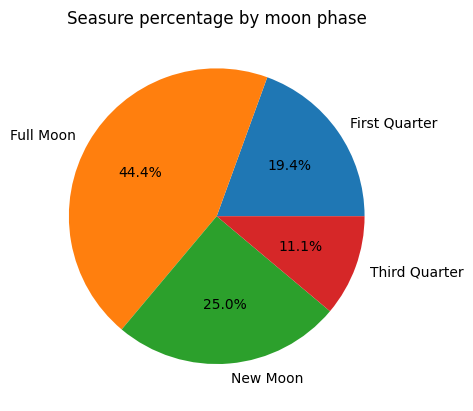

In [13]:

plt.pie(
    count_moontype['Count'],
    labels=count_moontype['Moon Type'],
    autopct='%1.1f%%',
)

plt.title('Seasure percentage by moon phase')


Text(0.5, 1.0, 'Seizures count by month')

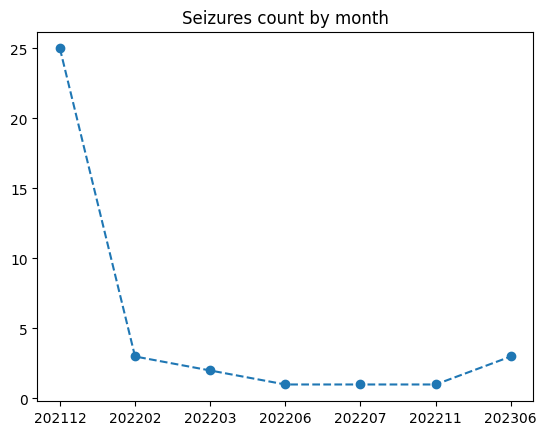

In [14]:
group_year['full_date'] = group_year['Year'].astype('str')+group_year['Month']

plt.plot_date(
    group_year['full_date'],
    group_year['Count'], 
    linestyle='--',
)

plt.title('Seizures count by month')

Text(0.5, 1.0, 'Seasure percentage by moon phase since Jan 2022')

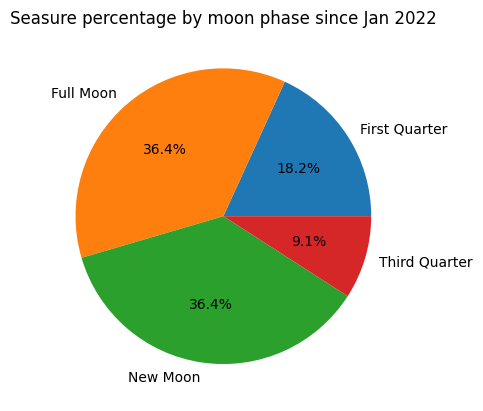

In [22]:
count_moontype_no2021 = conc[conc['year'] > 2021].groupby('moon_type')['int'].count(
).reset_index().set_axis(['Moon Type', 'Count'], axis=1)
# count_moontype_no2021

plt.pie(
    count_moontype_no2021['Count'],
    labels=count_moontype_no2021['Moon Type'],
    autopct='%1.1f%%',
)

plt.title('Seasure percentage by moon phase since Jan 2022')


## Conclusion

On a first glance it appears that there is a higher proportion of seizures occurring at the time of the full moon. 

I decided to re-analyze the data excluding the month of December 2021, which was when the symptoms first became visible. Looking only at the data for seizures occurring once the disease was stabilized with antiepileptics it is apparent that the proportion of seizures at full/new moon is similar.

I don't have enough data to discredit my vet's sayings but I'm not sold on the idea of the moon phase having any effect on the possibility of a seizure happening.